In [1]:
#!sudo /opt/conda/bin/conda install conda-build -y

In [2]:
#!sudo /opt/conda/bin/conda-develop -n QML-QPF PATH /workspaces/QML-QPF/mosaiQue

In [3]:

#import tensorflow as tf
#from tensorflow import keras
import mosaique as mq
from concurrent.futures import ProcessPoolExecutor, as_completed
import itertools
import numpy as np
import pennylane as qml
import os
import time
import datetime
from tensorflow import keras
from mosaique.models.operation import OperationLayer
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

mnist_dataset = keras.datasets.mnist
train_layer = mq.ConvolutionLayer4x4("mnist_train")
test_layer = mq.ConvolutionLayer4x4("mnist_test")
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()
train_layer.fit(train_images)
test_layer.fit(test_images)


2024-11-21 04:07:01.593124: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-21 04:07:02.317926: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:


def model(variant, tr_layer, te_layer):
    tr_images = tr_layer.open(variant)
    te_images =  te_layer.open(variant)

    log_dir = tr_layer.name + "/run1/" + ''.join(map(str,variant))

    tensorboard_callback = keras.callbacks.TensorBoard(
        log_dir=log_dir,
        histogram_freq=1,
        write_graph=True,
        write_images=True,
        write_steps_per_second=True,
        update_freq='batch',
        profile_batch=1,
        embeddings_freq=1,
        embeddings_metadata=None
    )
    q_model = keras.models.Sequential([
        keras.layers.Rescaling(scale=1. / 127.5, offset=-1),
        keras.layers.Flatten(),
        keras.layers.Dense(10, activation="softmax")
    ])
    q_model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    q_history = q_model.fit(
        tr_images,
        train_labels,
        validation_data=(te_images, test_labels),
        batch_size=1000,
        epochs=30,
        verbose=2,
        callbacks=[tensorboard_callback]
    )

In [5]:
permutations = np.asarray(list(itertools.permutations(range(4))))

#[model(variant = p, tr_layer = train_layer, te_layer= test_layer) for p in permutations[:1]]

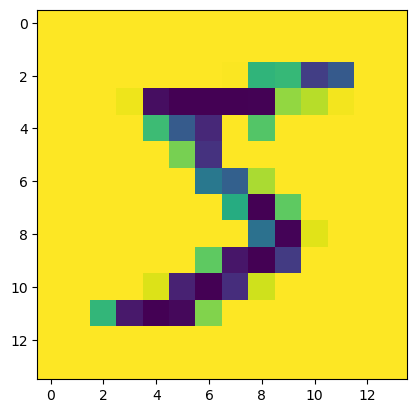

In [6]:
from matplotlib import pyplot as plt

plt.imshow(train_layer.open([0,1,2,3])[0][:,:,3])

In [ ]:


for j in range(3):
    with ProcessPoolExecutor(8) as executor:
        runner = {
            executor.submit(model,variant = p, tr_layer = train_layer, te_layer= test_layer): p for p in permutations[8*j:8*(j+1)]
        }
        for future in as_completed(runner):
            runner.pop(future)
# 1 min 8 sec

2024-11-21 04:07:03.596189: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:03.596298: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:03.598047: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:03.598135: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:03.598527: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:03.598594: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:03.599602: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:03.599666: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:03.616681: I external/local

Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30


2024-11-21 04:07:05.018559: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:05.018613: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:05.100113: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:05.100255: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:05.100614: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:05.100707: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:05.107521: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:05.107630: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:05.168711: I external/local

Epoch 1/30


2024-11-21 04:07:05.238744: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:05.238934: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:05.282424: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:05.282569: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
I0000 00:00:1732162025.525668  986294 service.cc:145] XLA service 0x712d80039590 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732162025.525785  986294 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2080, Compute Capability 7.5
I0000 00:00:1732162025.536949  986225 service.cc:145] XLA service 0x712d700556f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732162025.537429  986225 service.cc:153]

60/60 - 2s - 35ms/step - accuracy: 0.3475 - loss: 2.0960 - val_accuracy: 0.6473 - val_loss: 1.7610
Epoch 2/30
60/60 - 2s - 39ms/step - accuracy: 0.3641 - loss: 2.0930 - val_accuracy: 0.6001 - val_loss: 1.7743
Epoch 2/30
60/60 - 2s - 39ms/step - accuracy: 0.3226 - loss: 2.1662 - val_accuracy: 0.5995 - val_loss: 1.8441
Epoch 2/30
60/60 - 2s - 38ms/step - accuracy: 0.3152 - loss: 2.1764 - val_accuracy: 0.5888 - val_loss: 1.8509
Epoch 2/30
60/60 - 2s - 41ms/step - accuracy: 0.3359 - loss: 2.1335 - val_accuracy: 0.6635 - val_loss: 1.8128
Epoch 2/30
60/60 - 2s - 38ms/step - accuracy: 0.3597 - loss: 2.0891 - val_accuracy: 0.6601 - val_loss: 1.7609
Epoch 2/30
60/60 - 2s - 40ms/step - accuracy: 0.3665 - loss: 2.0890 - val_accuracy: 0.6072 - val_loss: 1.7480
Epoch 2/30
60/60 - 2s - 40ms/step - accuracy: 0.3485 - loss: 2.1147 - val_accuracy: 0.6552 - val_loss: 1.7858
Epoch 2/30
60/60 - 0s - 8ms/step - accuracy: 0.6930 - loss: 1.5630 - val_accuracy: 0.7724 - val_loss: 1.3454
Epoch 3/30
60/60 - 1s 

2024-11-21 04:07:26.898026: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:26.898023: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:26.898039: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:26.898103: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:26.898104: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:26.898105: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:26.898141: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:26.898186: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:26.916979: I external/local

Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30


2024-11-21 04:07:28.374490: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:28.374652: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:28.420438: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:28.420480: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:28.438221: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:28.438272: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:28.438315: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:28.438347: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:28.465667: I external/local

60/60 - 2s - 35ms/step - accuracy: 0.3546 - loss: 2.0936 - val_accuracy: 0.6549 - val_loss: 1.7673
Epoch 2/30
60/60 - 2s - 37ms/step - accuracy: 0.3058 - loss: 2.1434 - val_accuracy: 0.5574 - val_loss: 1.8098
Epoch 2/30
60/60 - 2s - 39ms/step - accuracy: 0.3357 - loss: 2.1146 - val_accuracy: 0.6167 - val_loss: 1.7691
Epoch 2/30
60/60 - 3s - 42ms/step - accuracy: 0.3863 - loss: 2.0382 - val_accuracy: 0.6155 - val_loss: 1.7151
Epoch 2/30
60/60 - 3s - 42ms/step - accuracy: 0.3607 - loss: 2.1094 - val_accuracy: 0.6267 - val_loss: 1.7816
Epoch 2/30
60/60 - 3s - 43ms/step - accuracy: 0.3129 - loss: 2.1515 - val_accuracy: 0.5766 - val_loss: 1.8393
Epoch 2/30
60/60 - 1s - 11ms/step - accuracy: 0.6992 - loss: 1.5502 - val_accuracy: 0.7631 - val_loss: 1.3345
Epoch 3/30
60/60 - 3s - 44ms/step - accuracy: 0.3530 - loss: 2.0940 - val_accuracy: 0.6694 - val_loss: 1.7616
Epoch 2/30
60/60 - 3s - 47ms/step - accuracy: 0.3488 - loss: 2.1015 - val_accuracy: 0.6365 - val_loss: 1.7813
Epoch 2/30
60/60 - 1s

2024-11-21 04:07:49.294084: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:49.294191: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:49.300586: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:49.300682: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:49.302042: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:49.302109: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:49.302574: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:49.302635: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:49.317305: I external/local

Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30
Epoch 1/30


2024-11-21 04:07:50.749814: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:50.749870: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:50.823099: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:50.823138: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:50.841709: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:50.841775: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:50.851126: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2024-11-21 04:07:50.851172: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2024-11-21 04:07:50.855374: I external/local

60/60 - 2s - 36ms/step - accuracy: 0.3406 - loss: 2.1336 - val_accuracy: 0.6543 - val_loss: 1.7949
Epoch 2/30
60/60 - 2s - 38ms/step - accuracy: 0.3381 - loss: 2.1268 - val_accuracy: 0.6324 - val_loss: 1.8032
Epoch 2/30
60/60 - 2s - 39ms/step - accuracy: 0.3878 - loss: 2.0624 - val_accuracy: 0.6780 - val_loss: 1.7351
Epoch 2/30
60/60 - 2s - 41ms/step - accuracy: 0.3512 - loss: 2.1038 - val_accuracy: 0.6016 - val_loss: 1.7477
60/60 - 2s - 41ms/step - accuracy: 0.3528 - loss: 2.0928 - val_accuracy: 0.6243 - val_loss: 1.7643
Epoch 2/30
Epoch 2/30
60/60 - 2s - 39ms/step - accuracy: 0.3116 - loss: 2.1529 - val_accuracy: 0.6229 - val_loss: 1.8268
Epoch 2/30
60/60 - 2s - 40ms/step - accuracy: 0.3634 - loss: 2.0791 - val_accuracy: 0.6200 - val_loss: 1.7460
Epoch 2/30
60/60 - 0s - 8ms/step - accuracy: 0.7200 - loss: 1.5681 - val_accuracy: 0.7841 - val_loss: 1.3414
Epoch 3/30
60/60 - 2s - 41ms/step - accuracy: 0.3828 - loss: 2.0464 - val_accuracy: 0.6140 - val_loss: 1.7255
Epoch 2/30
60/60 - 1s 